# Image Processing

In [1]:
import graphcat
import graphcat.notebook

In [2]:
graph = graphcat.Graph()

In [3]:
import PIL.Image

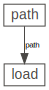

In [4]:
def load(label, inputs):
    path = inputs["path"][0]
    return PIL.Image.open(path)

graph.set_task("path", graphcat.constant("astronaut.jpg"))
graph.set_task("load", load)
graph.set_relationships("path", ("load", "path"))
graphcat.notebook.display(graph)

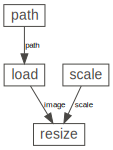

In [5]:
def resize(label, inputs):
    image = inputs["image"][0]
    scale = inputs["scale"][0]
    return image.resize((int(image.width * scale), int(image.height * scale)))

graph.set_task("scale", graphcat.constant(0.2))
graph.set_task("resize", resize)
graph.set_relationships("scale", ("resize", "scale"))
graph.set_relationships("load", ("resize", "image"))
graphcat.notebook.display(graph)

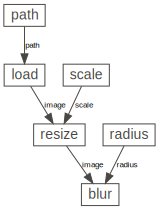

In [6]:
import PIL.ImageFilter

def blur(label, inputs):
    image = inputs["image"][0]
    radius = inputs["radius"][0]
    return image.filter(PIL.ImageFilter.GaussianBlur(radius))

graph.set_task("radius", graphcat.constant(5))
graph.set_task("blur", blur)
graph.set_relationships("radius", ("blur", "radius"))
graph.set_relationships("resize", ("blur", "image"))
graphcat.notebook.display(graph)

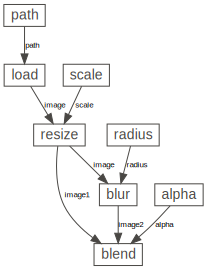

In [7]:
import PIL.ImageChops

def blend(label, inputs):
    image1 = inputs["image1"][0]
    image2 = inputs["image2"][0]
    alpha = inputs["alpha"][0]
    return PIL.ImageChops.blend(image1, image2, alpha)

graph.set_task("alpha", graphcat.constant(0.7))
graph.set_task("blend", blend)
graph.set_relationships("alpha", ("blend", "alpha"))
graph.set_relationships("resize", ("blend", "image1"))
graph.set_relationships("blur", ("blend", "image2"))
graphcat.notebook.display(graph)

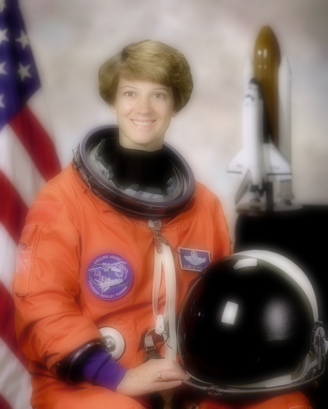

In [8]:
graph.output("blend")

In [22]:
import ipywidgets as widgets

In [23]:
import logging
logging.basicConfig(level=logging.DEBUG)

logger = graphcat.Logger(graph)

def set_graph_value(label):
    def implementation(change):
        graph.set_task(label, graphcat.constant(change["new"]))
    return implementation

scale_widget = widgets.FloatSlider(description="Scale:", min=0.01, max=1, value=0.2, step=0.01, continuous_update=False)
scale_widget.observe(set_graph_value("scale"), names="value")

radius_widget = widgets.FloatSlider(description="Blur:", min=0, max=10, value=5, step=1, continuous_update=False)
radius_widget.observe(set_graph_value("radius"), names="value")

alpha_widget = widgets.FloatSlider(description="Strength:", min=0, max=1, value=0.7, step=0.01, continuous_update=False)
alpha_widget.observe(set_graph_value("alpha"), names="value")

out_widget = widgets.Output()
out_widget.layout.height="500px"

display(scale_widget)
display(radius_widget)
display(alpha_widget)
display(out_widget)

def graph_changed(graph):
    with out_widget:
        out_widget.clear_output()
        display(graph.output("blend"))
        
graph.on_changed.connect(graph_changed)

graph_changed(graph)

FloatSlider(value=0.2, continuous_update=False, description='Scale:', max=1.0, min=0.01, step=0.01)

FloatSlider(value=5.0, continuous_update=False, description='Blur:', max=10.0, step=1.0)

FloatSlider(value=0.7, continuous_update=False, description='Strength:', max=1.0, step=0.01)

Output(layout=Layout(height='500px'))